# 11.1 문제 정의
카드 거래 내역 데이터셋을 이용해 이상거래를 예측하라.

이상거래에 관련된 데이터입니다. 이상거래라 함은 카드값을 지불하지 않을 의도를 가지고서 결제를 하거나, 도난된 카드를 가지고 결제를 하는 드으이 거래를 의미합니다. 종속변수는 이상거럐 여부이고, 독립변수는 거래 시간, 거래 금액, 고객 성별, 상점 범주 등입니다.

## 11.2 라이브러리 및 데이터 불러오기, 데이터 확인하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/fraud.csv'
data = pd.read_csv(file_url)

In [2]:
data.shape

(1852394, 22)

In [3]:
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
# 이상 거래  여부 건수 확인
data['is_fraud'].value_counts()

is_fraud
0    1842743
1       9651
Name: count, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int

In [6]:
# 결측치 확인
data.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [7]:
# 데이터가 크면 생략됨, Non-null count가 보이도록 출력
data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1852394 non-null  object 
 1   cc_num                 1852394 non-null  int64  
 2   merchant               1852394 non-null  object 
 3   category               1852394 non-null  object 
 4   amt                    1852394 non-null  float64
 5   first                  1852394 non-null  object 
 6   last                   1852394 non-null  object 
 7   gender                 1852394 non-null  object 
 8   street                 1852394 non-null  object 
 9   city                   1852394 non-null  object 
 10  state                  1852394 non-null  object 
 11  zip                    1852394 non-null  int64  
 12  lat                    1852394 non-null  float64
 13  long                   1852394 non-null  float64
 14  city_pop          

In [8]:
# 통계 정보 확인
round(data.describe(), 2)

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1.852394e+06,1852394.00,1852394.00,1852394.00
mean,4.173860e+17,70.06,48813.26,38.54,-90.23,88643.67,1.358674e+09,38.54,-90.23,0.01
std,1.309115e+18,159.25,26881.85,5.07,13.75,301487.62,1.819508e+07,5.11,13.76,0.07
min,6.041621e+10,1.00,1257.00,20.03,-165.67,23.00,1.325376e+09,19.03,-166.67,0.00
25%,1.800429e+14,9.64,26237.00,34.67,-96.80,741.00,1.343017e+09,34.74,-96.90,0.00
50%,3.521417e+15,47.45,48174.00,39.35,-87.48,2443.00,1.357089e+09,39.37,-87.44,0.00
75%,4.642255e+15,83.10,72042.00,41.94,-80.16,20328.00,1.374581e+09,41.96,-80.25,0.00
max,4.992346e+18,28948.90,99921.00,66.69,-67.95,2906700.00,1.388534e+09,67.51,-66.95,1.00


## 11.3 전처리 : 데이터 클리닝

In [9]:
# 불필요한 변수들 제외
data.drop(['first','last','street','city','state','zip','trans_num','unix_time','job','merchant'], axis=1, inplace= True)

In [10]:
# 날짜 변수를 datetime형으로 수정
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 12 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   category               object        
 3   amt                    float64       
 4   gender                 object        
 5   lat                    float64       
 6   long                   float64       
 7   city_pop               int64         
 8   dob                    object        
 9   merch_lat              float64       
 10  merch_long             float64       
 11  is_fraud               int64         
dtypes: datetime64[ns](1), float64(5), int64(3), object(3)
memory usage: 169.6+ MB


## 11.4 전처리 : 피처 엔지니어링

### 11.4.1 결제 금액

In [12]:
# cc_num별 amt 평균과 0표준편차 계산
# amt_info = data.groupby('cc_num').agg(['mean','std'])['amt'].reset_index()
amt_info = data.groupby('cc_num').agg({'amt': ['mean','std']})['amt'].reset_index()

In [13]:
amt_info.head()

,cc_num,mean,std
0,60416207185,59.257796,142.869746
1,60422928733,65.483159,92.042844
2,60423098130,96.376084,1000.693872
3,60427851591,107.487550,131.014534
4,60487002085,64.096925,153.207660


In [14]:
# 데이터 합치기
data = data.merge(amt_info, on ='cc_num', how='left')

In [15]:
# Z-Score 계산
data['amt_z_score'] = (data['amt'] - data['mean']) / data['std']

In [16]:
data.head()

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,mean,std,amt_z_score
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,F,36.0788,-81.1781,3495,1988-03-09,36.011293,-82.048315,0,89.408743,127.530101,-0.662108
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,56.078113,159.201852,0.321302
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,M,42.1808,-112.2620,4154,1962-01-19,43.150704,-112.154481,0,69.924272,116.688602,1.287064
3,2019-01-01 00:01:16,3534093764340240,gas_transport,45.00,M,46.2306,-112.1138,1939,1967-01-12,47.034331,-112.561071,0,80.090040,280.077880,-0.125287
4,2019-01-01 00:03:06,375534208663984,misc_pos,41.96,M,38.4207,-79.4629,99,1986-03-28,38.674999,-78.632459,0,95.341146,94.322842,-0.565941


In [17]:
data[['amt','mean','std','amt_z_score']].head()

,amt,mean,std,amt_z_score
0,4.97,89.408743,127.530101,-0.662108
1,107.23,56.078113,159.201852,0.321302
2,220.11,69.924272,116.688602,1.287064
3,45.00,80.090040,280.077880,-0.125287
4,41.96,95.341146,94.322842,-0.565941


In [18]:
# mean과 std는 Z-Score 구하는데 필요한 값일 뿐 예측에는 필요하지 않아 제거
data.drop(['mean','std'], axis=1, inplace=True)

### 11.4.2 범주

In [19]:
# cc_num과 category기준으로 amt의 평균, 표준편차 계산

# category_info = data.groupby(['cc_num','category']).agg(['mean','std'])['amt'].reset_index()
category_info = data.groupby(['cc_num','category']).agg({'amt': ['mean','std']})['amt'].reset_index()

In [20]:
category_info.head()

,cc_num,category,mean,std
0,60416207185,entertainment,51.838855,65.485714
1,60416207185,food_dining,26.737097,46.382603
2,60416207185,gas_transport,59.779429,15.758267
3,60416207185,grocery_net,52.152973,17.694871
4,60416207185,grocery_pos,101.557761,21.894156


In [21]:
# 데이터 합치기
data = data.merge(category_info, on =['cc_num','category'], how='left')

In [22]:
data.head()

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_z_score,mean,std
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,F,36.0788,-81.1781,3495,1988-03-09,36.011293,-82.048315,0,-0.662108,84.860809,116.070300
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0.321302,99.637224,23.904424
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,M,42.1808,-112.2620,4154,1962-01-19,43.150704,-112.154481,0,1.287064,46.653103,60.385161
3,2019-01-01 00:01:16,3534093764340240,gas_transport,45.00,M,46.2306,-112.1138,1939,1967-01-12,47.034331,-112.561071,0,-0.125287,61.537283,15.746841
4,2019-01-01 00:03:06,375534208663984,misc_pos,41.96,M,38.4207,-79.4629,99,1986-03-28,38.674999,-78.632459,0,-0.565941,35.481357,4.934731


In [23]:
# Z-Score 계산
data['cat_z_score'] = (data['amt'] - data['mean']) / data['std']
# 변수 제거
data.drop(['mean','std'], axis=1, inplace=True)

In [24]:
data.head()

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_z_score,cat_z_score
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,F,36.0788,-81.1781,3495,1988-03-09,36.011293,-82.048315,0,-0.662108,-0.688297
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0.321302,0.317631
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,M,42.1808,-112.2620,4154,1962-01-19,43.150704,-112.154481,0,1.287064,2.872509
3,2019-01-01 00:01:16,3534093764340240,gas_transport,45.00,M,46.2306,-112.1138,1939,1967-01-12,47.034331,-112.561071,0,-0.125287,-1.050197
4,2019-01-01 00:03:06,375534208663984,misc_pos,41.96,M,38.4207,-79.4629,99,1986-03-28,38.674999,-78.632459,0,-0.565941,1.312866


### 11.4.3 거리

In [25]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [26]:
import geopy.distance

In [27]:
data[['merch_lat', 'merch_long']].head()

,merch_lat,merch_long
0,36.011293,-82.048315
1,49.159047,-118.186462
2,43.150704,-112.154481
3,47.034331,-112.561071
4,38.674999,-78.632459


In [28]:
# 위도, 경도 한 변수(튜플)로 합치기
data['merch_coord'] = pd.Series(zip(data['merch_lat'], data['merch_long']))
data['cust_coord'] = pd.Series(zip(data['lat'], data['long']))

In [29]:
data.head()

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_z_score,cat_z_score,merch_coord,cust_coord
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,F,36.0788,-81.1781,3495,1988-03-09,36.011293,-82.048315,0,-0.662108,-0.688297,"(36.011293, -82.048315)","(36.0788, -81.1781)"
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0.321302,0.317631,"(49.159047, -118.186462)","(48.8878, -118.2105)"
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,M,42.1808,-112.2620,4154,1962-01-19,43.150704,-112.154481,0,1.287064,2.872509,"(43.150704, -112.154481)","(42.1808, -112.262)"
3,2019-01-01 00:01:16,3534093764340240,gas_transport,45.00,M,46.2306,-112.1138,1939,1967-01-12,47.034331,-112.561071,0,-0.125287,-1.050197,"(47.034331, -112.561071)","(46.2306, -112.1138)"
4,2019-01-01 00:03:06,375534208663984,misc_pos,41.96,M,38.4207,-79.4629,99,1986-03-28,38.674999,-78.632459,0,-0.565941,1.312866,"(38.674999, -78.632459)","(38.4207, -79.4629)"


In [30]:
# geopy.distance.distance((위도1, 경도1), (위도2, 경도2)) : 튜플 형태로 받아서 거리 계산
# data['distance'] = data.apply(lambda x: geopy.distance.distance(x['merch_coord'], x['cust_coord']).km, axis=1)

#### 코드가 실행된 시간 측정하기

In [31]:
import time

In [32]:
time.time()

1752563625.7133896

In [33]:
start_time = time.time()
data['distance'] = data.apply(lambda x: geopy.distance.distance(x['merch_coord'], x['cust_coord']).km, axis=1)
end_time = time.time()
print(end_time-start_time)

243.67602396011353


#### z-score 구하기

In [34]:
# cc_num별 거리 정보 계산
distance_info = data.groupby('cc_num').agg({'distance': ['mean','std']})['distance'].reset_index()
# 데이터 합치기
data = data.merge(distance_info, on ='cc_num', how='left')
# z-score 계산
data['distance_z_score'] = (data['distance'] - data['mean']) / data['std']
# 변수 제거
data.drop(['mean','std'], axis=1, inplace=True)

In [35]:
data.head()

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_z_score,cat_z_score,merch_coord,cust_coord,distance,distance_z_score
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,F,36.0788,-81.1781,3495,1988-03-09,36.011293,-82.048315,0,-0.662108,-0.688297,"(36.011293, -82.048315)","(36.0788, -81.1781)",78.773821,0.030974
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0.321302,0.317631,"(49.159047, -118.186462)","(48.8878, -118.2105)",30.216618,-1.475224
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,M,42.1808,-112.2620,4154,1962-01-19,43.150704,-112.154481,0,1.287064,2.872509,"(43.150704, -112.154481)","(42.1808, -112.262)",108.102912,1.160572
3,2019-01-01 00:01:16,3534093764340240,gas_transport,45.00,M,46.2306,-112.1138,1939,1967-01-12,47.034331,-112.561071,0,-0.125287,-1.050197,"(47.034331, -112.561071)","(46.2306, -112.1138)",95.685115,0.818063
4,2019-01-01 00:03:06,375534208663984,misc_pos,41.96,M,38.4207,-79.4629,99,1986-03-28,38.674999,-78.632459,0,-0.565941,1.312866,"(38.674999, -78.632459)","(38.4207, -79.4629)",77.702395,0.064037


### 11.4.4 나이 구하기

In [36]:
# 나이 계산(2021년 기준으로 나이 측정)
data['age'] = 2021 - pd.to_datetime(data['dob']).dt.year

In [37]:
# 불필요한 변수 제거
data.drop(['cc_num','lat','long', 'merch_lat', 'merch_long','dob','merch_coord','cust_coord'], axis = 1, inplace=True)

In [38]:
data.head()

,trans_date_trans_time,category,amt,gender,city_pop,is_fraud,amt_z_score,cat_z_score,distance,distance_z_score,age
0,2019-01-01 00:00:18,misc_net,4.97,F,3495,0,-0.662108,-0.688297,78.773821,0.030974,33
1,2019-01-01 00:00:44,grocery_pos,107.23,F,149,0,0.321302,0.317631,30.216618,-1.475224,43
2,2019-01-01 00:00:51,entertainment,220.11,M,4154,0,1.287064,2.872509,108.102912,1.160572,59
3,2019-01-01 00:01:16,gas_transport,45.00,M,1939,0,-0.125287,-1.050197,95.685115,0.818063,54
4,2019-01-01 00:03:06,misc_pos,41.96,M,99,0,-0.565941,1.312866,77.702395,0.064037,35


### 11.4.5 새 변수 만들기

In [39]:
# object 변수 더미 변수로 변환
data = pd.get_dummies(data, columns = ['category','gender'], drop_first = True)

In [40]:
# 인덱스 설정
data.set_index('trans_date_trans_time', inplace=True)

In [41]:
data.head()

,amt,city_pop,is_fraud,amt_z_score,cat_z_score,distance,distance_z_score,age,category_food_dining,category_gas_transport,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
trans_date_trans_time,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:18,4.97,3495,0,-0.662108,-0.688297,78.773821,0.030974,33,False,False,...,False,False,False,True,False,False,False,False,False,False
2019-01-01 00:00:44,107.23,149,0,0.321302,0.317631,30.216618,-1.475224,43,False,False,...,False,False,False,False,False,False,False,False,False,False
2019-01-01 00:00:51,220.11,4154,0,1.287064,2.872509,108.102912,1.160572,59,False,False,...,False,False,False,False,False,False,False,False,False,True
2019-01-01 00:01:16,45.00,1939,0,-0.125287,-1.050197,95.685115,0.818063,54,False,True,...,False,False,False,False,False,False,False,False,False,True
2019-01-01 00:03:06,41.96,99,0,-0.565941,1.312866,77.702395,0.064037,35,False,False,...,False,False,False,False,True,False,False,False,False,True


## 11.5 모델링 및 평가하기

In [42]:
# 특정 날짜를 기준으로 훈련셋과 시험셋을 분리
train = data[data.index < '2020-07-01']
test = data[data.index >= '2020-07-01']

In [43]:
# 시험셋 비율 확인
len(test) / len(data)

0.2837738623640543

In [44]:
# 종속변수를 분리하여 훈련셋과 시험셋 설정
X_train = train.drop('is_fraud', axis = 1)
X_test = test.drop('is_fraud', axis = 1)
y_train = train['is_fraud']
y_test = test['is_fraud']

In [45]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [46]:
import lightgbm as lgb

In [47]:
# 모델 객체 생성
model_1 = lgb.LGBMClassifier(random_state = 100)
# 학습
model_1.fit(X_train, y_train)
# 예측
pred_1 = model_1.predict(X_test)

[LightGBM] [Info] Number of positive: 7639, number of negative: 1319094
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012304 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1633
[LightGBM] [Info] Number of data points in the train set: 1326733, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005758 -> initscore=-5.151434
[LightGBM] [Info] Start training from score -5.151434


In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [49]:
# 정확도 확인
accuracy_score(y_test, pred_1)

0.9971635711989286

In [50]:
# 혼동 행렬 확인
print(confusion_matrix(y_test, pred_1))

[[522982    667]
 [   824   1188]]


In [51]:
# 분류 리포트 확인
print(classification_report(y_test, pred_1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.64      0.59      0.61      2012

    accuracy                           1.00    525661
   macro avg       0.82      0.79      0.81    525661
weighted avg       1.00      1.00      1.00    525661



In [52]:
# 예측(proba(): 0~1사이 소수점 형태)
proba_1 = model_1.predict_proba(X_test)

In [53]:
# 예측 결과 출력
proba_1

array([[9.99962157e-01, 3.78427633e-05],
       [9.99967056e-01, 3.29440932e-05],
       [9.99961104e-01, 3.88962459e-05],
       ...,
       [9.99965101e-01, 3.48987509e-05],
       [9.99848915e-01, 1.51085280e-04],
       [9.99946348e-01, 5.36517620e-05]])

In [54]:
# 1에 대한 예측 결과만 출력
proba_1[:,1]

array([3.78427633e-05, 3.29440932e-05, 3.88962459e-05, ...,
       3.48987509e-05, 1.51085280e-04, 5.36517620e-05])

In [55]:
# 예측 결과 재설정
proba_1 = proba_1[:,1]

In [56]:
# 0.2 기준으로 분류
proba_int1 = (proba_1 > 0.2).astype('int')
# 0.8 기준으로 분류
proba_int2 = (proba_1 > 0.8).astype('int')

In [57]:
# 혼동 행렬 확인
print(confusion_matrix(y_test, proba_int1))

[[522199   1450]
 [   597   1415]]


In [58]:
# 분류 리포트 확인
print(classification_report(y_test, proba_int1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.49      0.70      0.58      2012

    accuracy                           1.00    525661
   macro avg       0.75      0.85      0.79    525661
weighted avg       1.00      1.00      1.00    525661



In [59]:
# 혼동 행렬 확인
print(confusion_matrix(y_test, proba_int2))

[[523203    446]
 [   960   1052]]


In [60]:
# 분류 리포트 확인
print(classification_report(y_test, proba_int2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.70      0.52      0.60      2012

    accuracy                           1.00    525661
   macro avg       0.85      0.76      0.80    525661
weighted avg       1.00      1.00      1.00    525661



#### ROC 곡선과 AUC
이진분류 모델을 평가하는 방법으로, 기준점에 영향을 받지 않기 때문에 여러 모델을 비교할 때 요긴하게 사용됩니다. AUC는 ROC 곡선의 아래 면적을 의미하고, 0.5~1 사이의 값을 지니며 높을수록 좋은 모델입니다.

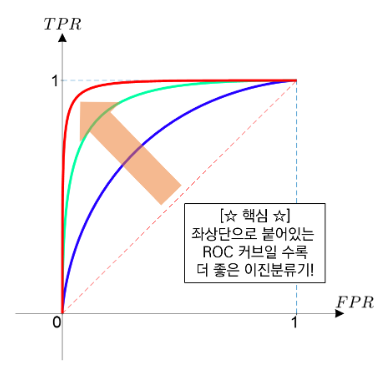

In [61]:
# AUC 확인
roc_auc_score(y_test, proba_1)

0.936830319432211

## 11.6 하이퍼파라미터 튜닝 : 랜덤 그리드 서치

In [62]:
from sklearn.model_selection import RandomizedSearchCV

In [63]:
params = {
          'n_estimators': [100, 500, 1000],  # 반복 횟수
          'learning_rate': [0.01, 0.05, 0.1, 0.3],  # 러닝 레이트
          'lambda_l1': [0,10,20,30,50],  # L1 정규화
          'lambda_l2': [0,10,20,30,50],  # L2 정규화
          'max_depth': [5,10,15,20],  # 최대 깊이
          'subsample': [0.6, 0.8, 1]}  # 서브샘플 비율

##### L1 정규화와 L2 정규화
둘 다 매개변수에 패널티를 가해서 그 영향력을 감소시키는 방법으로, 오버피팅을 방지하는 목적으로 쓰입니다. 
- L1 정규화 : 손실 함수에 절대값 항을 추가하여 가중치의 절대 크기 합을 최소화하는 방식으로 규제  
  - 너무 많은 가중치를 0으로 만들 수 있어 모델의 정확성이 떨어질 수 있음 
  - 몇 개의 중요 변수만 선택하기 때문에 정보 손실의 가능성 존재  
  - 중요한 것들만 빼고 0으로 만들어버리기 때문에 특성 선택에 유리(피처 셀렉션 효과) 

- L2 정규화 : 손실 함수에 가중치의 제곱합을 추가하여 모델의 가중치가 커지는 것을 규제  
  - 가중치 값을 0에 가깝게 줄이지만, 완전히 0으로 만드는 것이 아님  
  - 모든 특성을 보존하면서 가중치를 조절  
  - 특성 선택보다  모델의 안정성에 유리

In [64]:
# 모델 객체 생성
model_2 = lgb.LGBMClassifier(random_state = 100)
# 랜덤 그리드 서치 객체 생성
rs = RandomizedSearchCV(model_2, param_distributions=params, n_iter= 30, scoring = 'roc_auc', random_state=100, n_jobs=-1)

In [65]:
start = time.time()  # 시작시간 설정
rs.fit(X_train, y_train)  # 학습
print(time.time() - start)  # 총 소요 시간 확인

[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Info] Number of positive: 7639, number of negative: 1319094
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1633
[LightGBM] [Info] Number of data points in the train set: 1326733, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005758 -> initscore=-5.151434
[LightGBM] [Info] Start training from score -5.151434
1269.6788563728333


In [66]:
rs.best_params_  # 최적의 하이퍼파라미터 확인

{'subsample': 1,
 'n_estimators': 1000,
 'max_depth': 15,
 'learning_rate': 0.05,
 'lambda_l2': 20,
 'lambda_l1': 0}

In [67]:
rs_proba = rs.predict_proba(X_test)  # 예측
roc_auc_score(y_test, rs_proba[:,1])  # 정확도 확인

[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20


0.9953122884656392

In [68]:
# 0.2 기준으로 분류
rs_proba_int = (rs_proba[:,1] > 0.2).astype('int')
# 혼동 행렬 확인
print(confusion_matrix(y_test, rs_proba_int))

[[522519   1130]
 [   504   1508]]


In [69]:
# 분류 리포트 확인
print(classification_report(y_test, rs_proba_int))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.57      0.75      0.65      2012

    accuracy                           1.00    525661
   macro avg       0.79      0.87      0.82    525661
weighted avg       1.00      1.00      1.00    525661



## 11.7 LightGBM의 train() 함수 사용하기

In [70]:
train = data[data.index < '2020-01-01']  # 훈련셋 설정
val = data[(data.index >= '2020-01-01') & (data.index < '2020-07-01')]  # 검증셋 설정
test = data[data.index >= '2020-07-01']  # 시험셋 설정

In [71]:
# 각 셋에서 독립변수와 종속변수 분리
X_train = train.drop('is_fraud', axis = 1)
X_val = val.drop('is_fraud', axis = 1)
X_test = test.drop('is_fraud', axis = 1)
y_train = train['is_fraud']
y_val = val['is_fraud']
y_test = test['is_fraud']

In [72]:
# 모델링에 사용되는 훈련셋과 검증셋의 데이터 타입 변환
d_train = lgb.Dataset(X_train, label=y_train)
d_val = lgb.Dataset(X_val, label=y_val)

In [73]:
params_set = rs.best_params_  # 최적의 파라미터 설정
params_set['metrics'] = 'auc'  # 평가 기준 추가

In [74]:
params_set  # 하이퍼파라미터 확인

{'subsample': 1,
 'n_estimators': 1000,
 'max_depth': 15,
 'learning_rate': 0.05,
 'lambda_l2': 20,
 'lambda_l1': 0,
 'metrics': 'auc'}

In [75]:
# train()함수로 훈련하고 그 결과를 model_3에 저장
# model_3 = lgb.train(params_set, d_train, valid_sets=[d_val], early_stopping_rounds=100,verbose_eval=100)
model_3 = lgb.train(params_set, d_train, valid_sets=[d_val], 
                    callbacks=[
                        lgb.early_stopping(stopping_rounds=100),  # 학습 시간 제한
                        lgb.log_evaluation(period=100)  # 출력물을 특정 간격으로 보여줌
                        ]
                    )

[LightGBM] [Warning] Provided parameters constrain tree depth (max_depth=15) without explicitly setting 'num_leaves'. This can lead to underfitting. To resolve this warning, pass 'num_leaves' (<=32768) in params. Alternatively, pass (max_depth=-1) and just use 'num_leaves' to constrain model complexity.
[LightGBM] [Warning] Provided parameters constrain tree depth (max_depth=15) without explicitly setting 'num_leaves'. This can lead to underfitting. To resolve this warning, pass 'num_leaves' (<=32768) in params. Alternatively, pass (max_depth=-1) and just use 'num_leaves' to constrain model complexity.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004858 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1633
[LightGBM] [Info] Number of data points in the train set: 924850, number of used features: 21
[LightGBM] [Warning] Provided parame

In [76]:
pred_3 = model_3.predict(X_test)  # 예측

In [77]:
roc_auc_score(y_test, pred_3)  # 정확도 확인

0.991352108964131

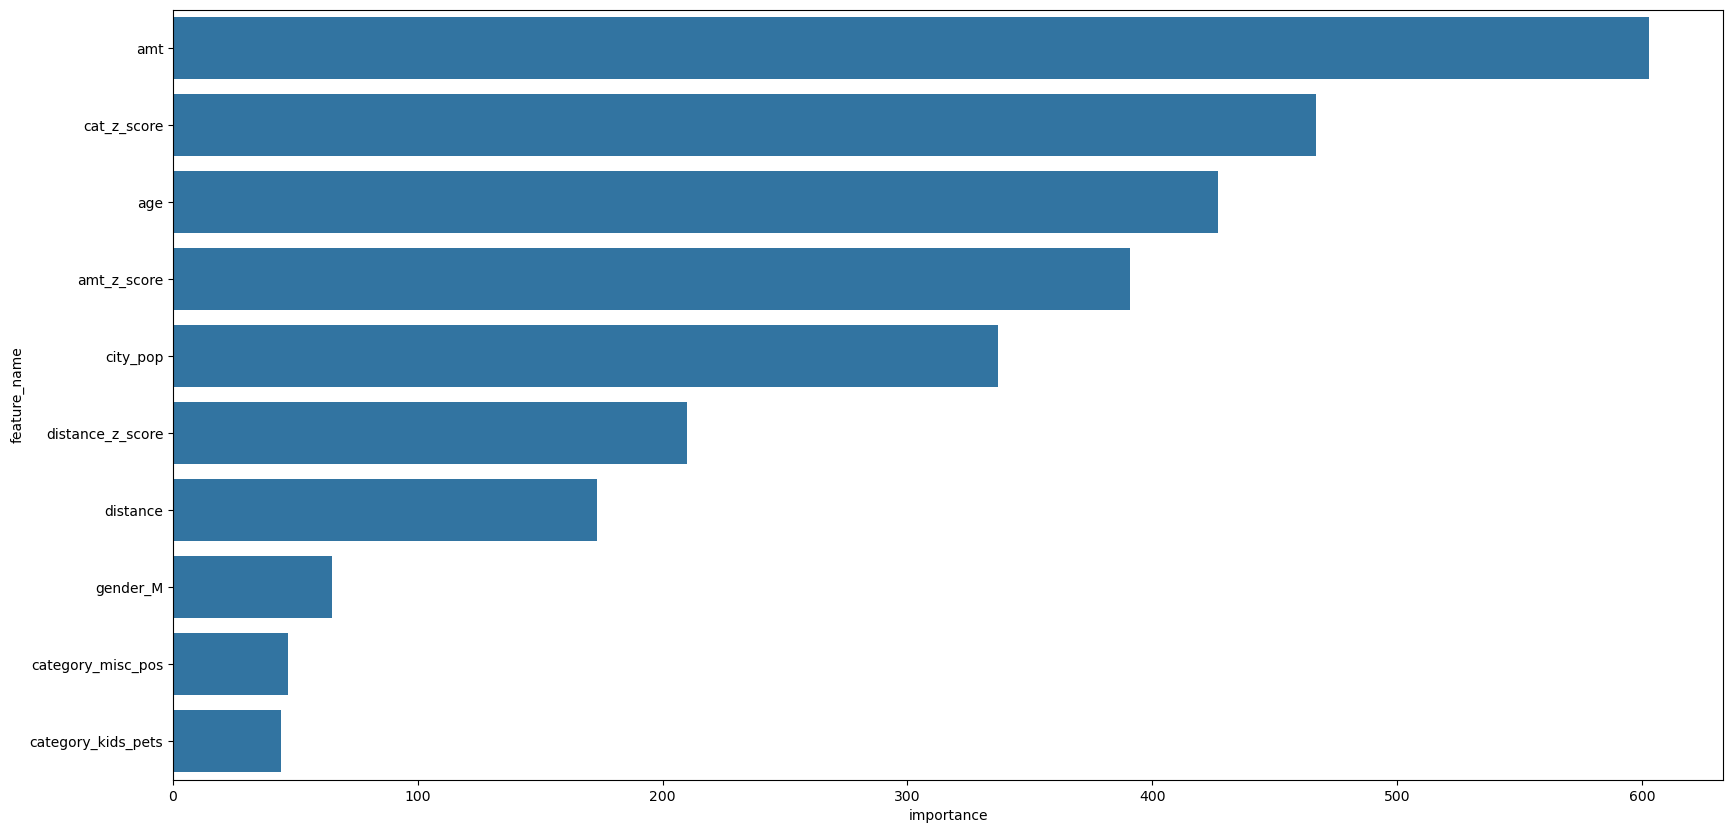

In [78]:
feature_imp = pd.DataFrame({'feature_name': X_train.columns, 'importance': model_1.feature_importances_}).sort_values('importance', ascending = False)
plt.figure(figsize=(20, 10))
sns.barplot(x="importance", y="feature_name", data=feature_imp.head(10))
plt.show()

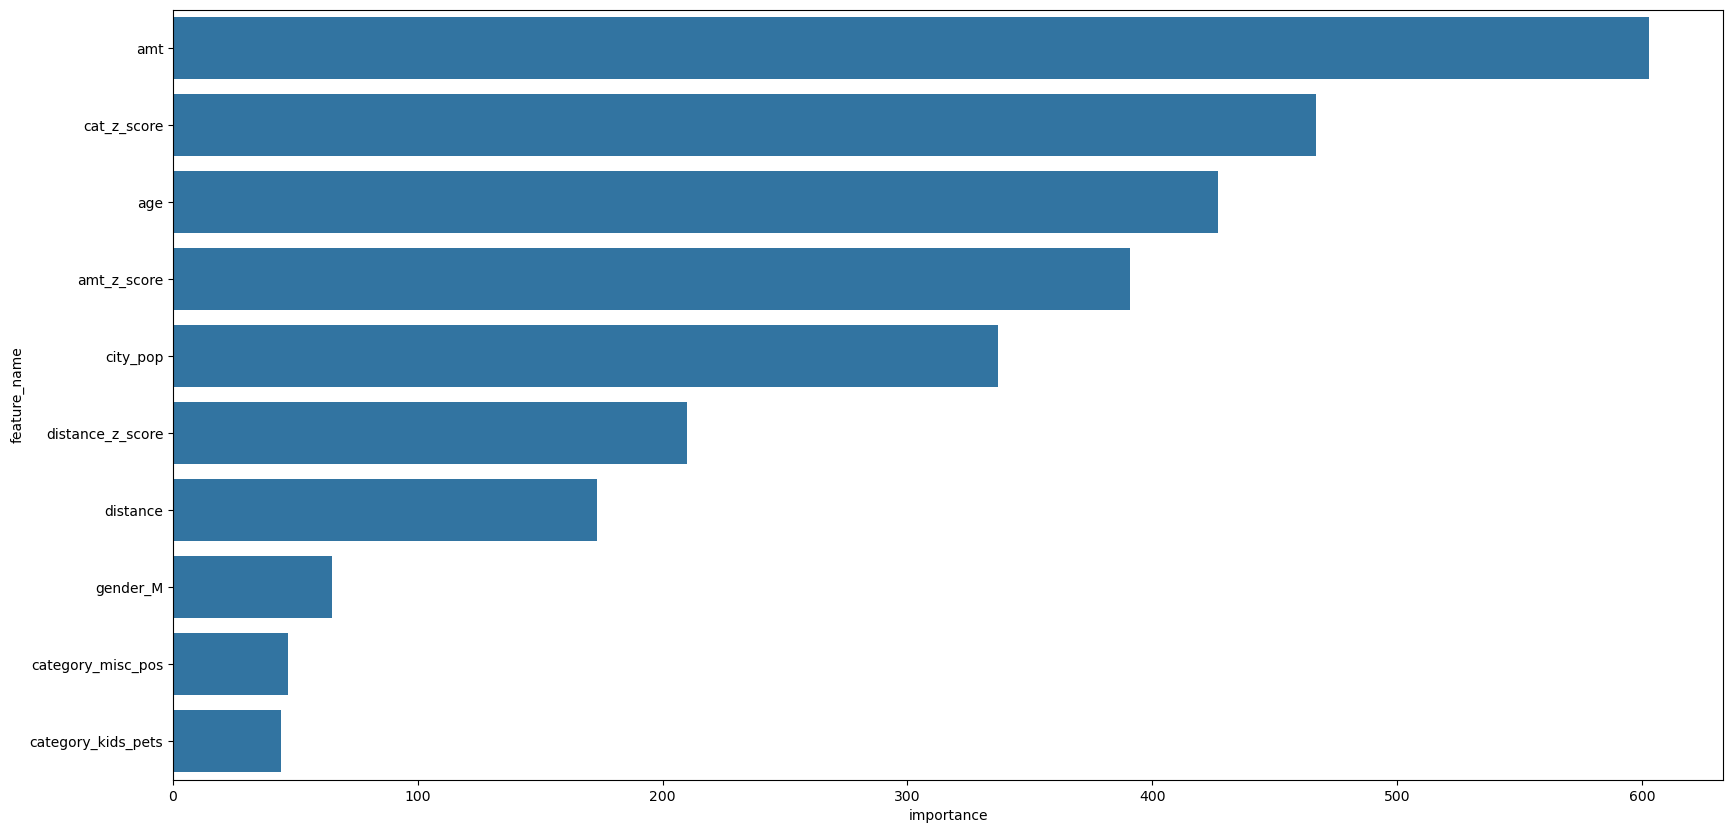

In [79]:
feature_imp_3 = pd.DataFrame(sorted(zip(model_3.feature_importance(), X_train.columns)), columns=['Value','Feature'])  # 중요 변수 정리
plt.figure(figsize=(20, 10))
sns.barplot(x="importance", y="feature_name", data=feature_imp.head(10))
plt.show()